# Bespoke Data Preprocessing:
*Remember to also preprocess test data.*

## Import and Setup:

In [1]:
import os

project_name = "KEDOPROJECt"

# Ugly way to hardcode project folder, did not work initially, solution in the works

os.chdir(r"C:\Users\HG314TY\PycharmProjects\KEDOPROJECt")
os.getcwd()

while not os.path.abspath(os.curdir).endswith(project_name):
    print(os.path.abspath(os.curdir))
    os.chdir('..')

print(os.path.abspath(os.curdir))

C:\Users\HG314TY\PycharmProjects\KEDOPROJECt


In [2]:
# Import libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from kedro.io import DataCatalog
from kedro.extras.datasets.pandas import (
    ExcelDataSet,
    CSVDataSet
)

from src.eyft.utils.processing import explore

C:\Users\HG314TY\Anaconda3\New folder\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\HG314TY\Anaconda3\New folder\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [ ]:
# now I do not split the data set in train & test I will do it later !!!

In [3]:
# Setup
pd.set_option('display.max_columns', None)

In [4]:
# Constants
input_data_dir = "./data/01_raw/train"
processed_dir = "./data/02_data_processing"
data_fname = "ds_flanders.xlsx"

## Explore and Process:

In [5]:
os.path.join(input_data_dir, data_fname)

'./data/01_raw/train\\ds_flanders.xlsx'

In [6]:
input_data_dir

'./data/01_raw/train'

In [7]:
train_key = "train_inputs"
save_key = "preprocessed_inputs"

In [8]:
io = DataCatalog(
    {
        train_key: ExcelDataSet(
            filepath = input_data_dir + "/" + data_fname
        ),
        save_key: ExcelDataSet(
            filepath = processed_dir + "/" + data_fname
        )
    }
)

In [9]:
df = io.load(train_key)

In [10]:
display(df)

,Selected,CD_REFNIS,Postcode,ID,Right_Postcode,Gemeente,Prijs,Slaapkamers,Bewoonbare_oppervlakte,Concat_information,Provincie,Provinciecodering,Gewest,EPC,Energieklasse,Prijs_per_m2,Bouwjaar,Kadastraal_inkomen,Staat_gebouw,Terrein,Gevels,Tuin,Verwarmingstype,DateTime_Out,Laatste_datum,Time_between_scrapes,Update_Prijs_per_vierkante_m,Quarter,Year,Asset_type,GEO_locatie,prijs_update,straat,badkamer,Verdieping,Overdekte_parking,Time_between_2_scrapes
0,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,325000,3,135,"Sale price â¬ 325,000\n325000 â¬ , ...",Antwerpen,4,Vlaanderen,259.0,C,2407.407407,0,0.0,As new,NaN,NaN,NaN,NaN,2020-02-06,2020-02-06,NaN,NaN,1,2020,Flats,Aartselaar,NaN,Hendrik De Braekeleerlaan 68,1.0,2.0,1.0,0.0
1,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,174000,2,90,"Sale price â¬ 174,000\n174000 â¬ ,C...",Antwerpen,4,Vlaanderen,644.0,F,1933.333333,1967,733.0,NaN,NaN,NaN,NaN,Gas,2020-02-06,2020-02-06,NaN,NaN,1,2020,Flats,Aartselaar,NaN,Antwerpsesteenweg 50,1.0,3.0,1.0,0.0
2,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,174000,2,90,"Flood zone type Non flood zone , E-l...",Antwerpen,4,Vlaanderen,644.0,F,1933.333333,1967,0.0,NaN,NaN,NaN,NaN,Gas,2020-03-12,2020-05-06,NaN,NaN,1,2020,Flats,Aartselaar,174000.0,Antwerpsesteenweg 5,1.0,3.0,1.0,55.0
3,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,199000,2,91,"Flood zone type Non flood zone , E-l...",Antwerpen,4,Vlaanderen,206.0,C,2186.813187,0,0.0,As new,NaN,NaN,NaN,Gas,2020-03-12,2020-03-12,NaN,2186.813187,1,2020,Flats,Aartselaar,199000.0,Hoevelei 194,NaN,1.0,NaN,0.0
4,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,239000,2,95,"Price â¬ 239,000\n239000 â¬ ,Cadast...",Antwerpen,4,Vlaanderen,229.0,C,2515.789474,1979,862.0,Just renovated,NaN,NaN,NaN,Gas,2020-03-30,2020-05-13,NaN,NaN,1,2020,Flats,Aartselaar,239000.0,Leon Gilliotlaan 40,1.0,2.0,1.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36059,1,73107,3630,https://www.immoweb.be/nl/zoekertje/villa/te-k...,3630,Eisden,895000,6,735,Stedenbouwkundige vergunning ontvangen Ja ...,Limburg,3,Vlaanderen,182.0,B,1217.687075,1930,0.0,Uitstekende staat,3650.0,4.0,0.0,NaN,2020-04-27,2020-04-27,0.0,NaN,2,2020,Houses,Maasmechelen,895000.0,Rijksweg 129,2.0,NaN,NaN,NaN
36060,1,73107,3631,https://www.immoweb.be/en/classified/apartment...,3631,Boorsem,259000,4,120,"Planning permission obtained Yes ,Flood...",Limburg,3,Vlaanderen,51.0,A,2158.333333,2015,0.0,As new,NaN,NaN,NaN,Gas,2020-12-23,2020-12-30,NaN,NaN,4,2020,Flats,Maasmechelen,259000.0,Grotestraat 325/1,1.0,NaN,NaN,7.0
36061,1,73107,3631,https://www.immoweb.be/nl/zoekertje/huis/te-ko...,3631,Boorsem,265000,3,130,Primair energieverbruik 487 kWh/mÂ²\nkilowattu...,Limburg,3,Vlaanderen,487.0,E,2038.461538,1965,0.0,Goed,386.0,4.0,0.0,NaN,2020-12-25,2020-12-25,0.0,NaN,4,2020,Houses,Maasmechelen,265000.0,Grotestraat 195,NaN,NaN,NaN,NaN
36062,1,73109,3793,https://www.immoweb.be/nl/zoekertje/huis/te-ko...,3793,Teuven,219000,4,110,"Prijs 219.000 â¬\n219000 â¬ , Type...",Limburg,3,Vlaanderen,665.0,F,1990.909091,0,0.0,Goed,350.0,4.0,0.0,NaN,2020-02-28,2020-02-28,0.0,NaN,1,2020,Houses,Voeren,219000.0,rue Varn 5,1.0,NaN,NaN,NaN


In [10]:
# Quickly translate columns to english to gain more understanding:
dutch_col2eng_col = {
    "Gemeente": "Municipality",
    "Prijs": "Price",
    "Slaapkamers": "Bedrooms",
    "Bewoonbare_oppervlakte": "Living Area",
    "Provincie": "Province",
    "Provinciecodering": "Province Code",
    "Gewest": "Region",
    "Energieklasse": "Energy Class",
    "Prijs_per_m2": "Price Per m2",
    "Bouwjaar": "Construction Year",
    "Kadastraal_inkomen": "Cadastral Income",
    "Staat_gebouw": "Type of Building",
    "Gevels": "Facades",
    "Tuin": "Garden",
    "Verwarmingstype": "Heating Type",
    "Laatste_datum": "Last Date",
    "Update_Prijs_per_vierkante_m": "Updated Price Per m2",
    "GEO_locatie": "GEO Location",
    "prijs_update": "Updated Price",
    "straat": "Street",
    "badkamer": "Bathroom",
    "Verdieping": "Floor",
    "Overdekte_parking": "Covered Parking",
}
df.rename(columns=dutch_col2eng_col, inplace=True)

In [11]:
# Clean and translate the concat info
texts = []
for text in df.Concat_information:
    text = text.replace('â\x82¬',' ').replace('â',' ').replace('¬',' ').replace('Â','').replace(',',' , ').replace('\n',' , ')
    text = re.sub(" +"," ",text)
    text = text.strip()
    texts.append(text)
df['Concat_information'] = texts

In [12]:
# Create a unified price per sqm variable
prices_sqm = df['Updated Price Per m2']
condition = prices_sqm.isnull()
for n in range(len(prices_sqm)):
    if condition[n]:
        prices_sqm[n] = df['Price Per m2'][n]
df['Price_sqm'] = prices_sqm

C:\Users\HG314TY\AppData\Local\Temp\ipykernel_31512\2400918078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_sqm[n] = df['Price Per m2'][n]


In [13]:
double_glaze_values = []
double_glaze = []
basement_values = []
basement = []
isolated_values = []
isolated = []
solar_panel_values = []
solar_panel = []
for text in df['Concat_information']:
    text = text.lower()
    # Double glazing
    text_aux = 'n'
    if 'double glazing' in text:
        pos = text.find('double glazing')
        text_aux = text[pos+len('double glazing'):text.find(',',pos)].strip() + 'n'
    elif 'dubbel glas' in text:
        pos = text.find('dubbel glas')
        text_aux = text[pos+len('dubbel glas'):text.find(',',pos)].strip() + 'n'
    double_glaze_values.append(text_aux)
    if text_aux[0] in ('j','y'):
        double_glaze.append('1') 
    else:
        double_glaze.append('0')
    # Basement
    text_aux = 'n'
    if 'basement' in text:
        pos = text.find('basement')
        text_aux = text[pos+len('basement'):text.find(',',pos)].strip() + 'n'
    elif 'kelder' in text:
        pos = text.find('kelder')
        text_aux = text[pos+len('kelder'):text.find(',',pos)].strip() + 'n'
    basement_values.append(text_aux)
    if text_aux[0] in ('j','y'):
        basement.append('1')
    else:
        basement.append('0')
    # Isolated
    text_aux = 'n'
    if 'isolated' in text:
        pos = text.find('isolated')
        text_aux = text[pos+len('isolated'):text.find(',',pos)].strip() + 'n'
    elif 'soleerd' in text:
        pos = text.find('soleerd')
        text_aux = text[pos+len('soleerd'):text.find(',',pos)].strip() + 'n'
    isolated_values.append(text_aux)
    if text_aux[0] in ('j','y','i'):
        isolated.append('1')
    else:
        isolated.append('0')
    # Solar panel
    text_aux = 'n'
    if 'solar panel' in text:
        pos = text.find('solar panel')
        text_aux = text[pos+len('solar panel'):text.find(',',pos)].strip() + 'n'
    elif 'zonnepanelen' in text:
        pos = text.find('zonnepanelen')
        text_aux = text[pos+len('zonnepanelen'):text.find(',',pos)].strip() + 'n'
    solar_panel_values.append(text_aux)
    if text_aux[0] not in ('nan','',np.nan,'n'):
        solar_panel.append('1')
    else:
        solar_panel.append('0')
df['Double_glaze'] = double_glaze
df['Basement'] = basement
df['Isolated'] = isolated
df['Solar_panel'] = solar_panel

In [15]:
df

,Selected,CD_REFNIS,Postcode,ID,Right_Postcode,Municipality,Price,Bedrooms,Living Area,Concat_information,Province,Province Code,Region,EPC,Energy Class,Price Per m2,Construction Year,Cadastral Income,Type of Building,Terrein,Facades,Garden,Heating Type,DateTime_Out,Last Date,Time_between_scrapes,Updated Price Per m2,Quarter,Year,Asset_type,GEO Location,Updated Price,Street,Bathroom,Floor,Covered Parking,Time_between_2_scrapes,Price_sqm,Double_glaze,Basement,Isolated,Solar_panel
0,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,325000,3,135,"Sale price 325 , 000 , 325000 , Property name ...",Antwerpen,4,Vlaanderen,259.0,C,2407.407407,0,0.0,As new,NaN,NaN,NaN,NaN,2020-02-06,2020-02-06,NaN,2407.407407,1,2020,Flats,Aartselaar,NaN,Hendrik De Braekeleerlaan 68,1.0,2.0,1.0,0.0,2407.407407,1,0,0,0
1,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,174000,2,90,"Sale price 174 , 000 , 174000 , Cadastral inco...",Antwerpen,4,Vlaanderen,644.0,F,1933.333333,1967,733.0,NaN,NaN,NaN,NaN,Gas,2020-02-06,2020-02-06,NaN,1933.333333,1,2020,Flats,Aartselaar,NaN,Antwerpsesteenweg 50,1.0,3.0,1.0,0.0,1933.333333,1,1,0,0
2,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,174000,2,90,"Flood zone type Non flood zone , E-level (prim...",Antwerpen,4,Vlaanderen,644.0,F,1933.333333,1967,0.0,NaN,NaN,NaN,NaN,Gas,2020-03-12,2020-05-06,NaN,1933.333333,1,2020,Flats,Aartselaar,174000.0,Antwerpsesteenweg 5,1.0,3.0,1.0,55.0,1933.333333,1,1,0,0
3,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,199000,2,91,"Flood zone type Non flood zone , E-level (prim...",Antwerpen,4,Vlaanderen,206.0,C,2186.813187,0,0.0,As new,NaN,NaN,NaN,Gas,2020-03-12,2020-03-12,NaN,2186.813187,1,2020,Flats,Aartselaar,199000.0,Hoevelei 194,NaN,1.0,NaN,0.0,2186.813187,1,0,0,0
4,1,11001,2630,https://www.immoweb.be/en/classified/apartment...,2630,Aartselaar,239000,2,95,"Price 239 , 000 , 239000 , Cadastral income 86...",Antwerpen,4,Vlaanderen,229.0,C,2515.789474,1979,862.0,Just renovated,NaN,NaN,NaN,Gas,2020-03-30,2020-05-13,NaN,2515.789474,1,2020,Flats,Aartselaar,239000.0,Leon Gilliotlaan 40,1.0,2.0,1.0,44.0,2515.789474,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36059,1,73107,3630,https://www.immoweb.be/nl/zoekertje/villa/te-k...,3630,Eisden,895000,6,735,"Stedenbouwkundige vergunning ontvangen Ja , Ov...",Limburg,3,Vlaanderen,182.0,B,1217.687075,1930,0.0,Uitstekende staat,3650.0,4.0,0.0,NaN,2020-04-27,2020-04-27,0.0,1217.687075,2,2020,Houses,Maasmechelen,895000.0,Rijksweg 129,2.0,NaN,NaN,NaN,1217.687075,0,0,0,0
36060,1,73107,3631,https://www.immoweb.be/en/classified/apartment...,3631,Boorsem,259000,4,120,"Planning permission obtained Yes , Flood zone ...",Limburg,3,Vlaanderen,51.0,A,2158.333333,2015,0.0,As new,NaN,NaN,NaN,Gas,2020-12-23,2020-12-30,NaN,2158.333333,4,2020,Flats,Maasmechelen,259000.0,Grotestraat 325/1,1.0,NaN,NaN,7.0,2158.333333,1,0,0,0
36061,1,73107,3631,https://www.immoweb.be/nl/zoekertje/huis/te-ko...,3631,Boorsem,265000,3,130,"Primair energieverbruik 487 kWh/m² , kilowattu...",Limburg,3,Vlaanderen,487.0,E,2038.461538,1965,0.0,Goed,386.0,4.0,0.0,NaN,2020-12-25,2020-12-25,0.0,2038.461538,4,2020,Houses,Maasmechelen,265000.0,Grotestraat 195,NaN,NaN,NaN,NaN,2038.461538,0,0,0,0
36062,1,73109,3793,https://www.immoweb.be/nl/zoekertje/huis/te-ko...,3793,Teuven,219000,4,110,"Prijs 219.000 , 219000 , Type bouw Alle types ...",Limburg,3,Vlaanderen,665.0,F,1990.909091,0,0.0,Goed,350.0,4.0,0.0,NaN,2020-02-28,2020-02-28,0.0,1990.909091,1,2020,Houses,Voeren,219000.0,rue Varn 5,1.0,NaN,NaN,NaN,1990.909091,0,0,0,0


In [16]:
x_cols = ["Price", "Bedrooms", "Facades"]
y_col = "EPC"

------------------------------
Analysing X: Price | Y: EPC
count    3.606400e+04
mean     4.216981e+05
std      4.234975e+05
min      1.200000e+04
25%      2.290000e+05
50%      2.990000e+05
75%      4.450000e+05
max      9.500000e+06
Name: Price, dtype: float64


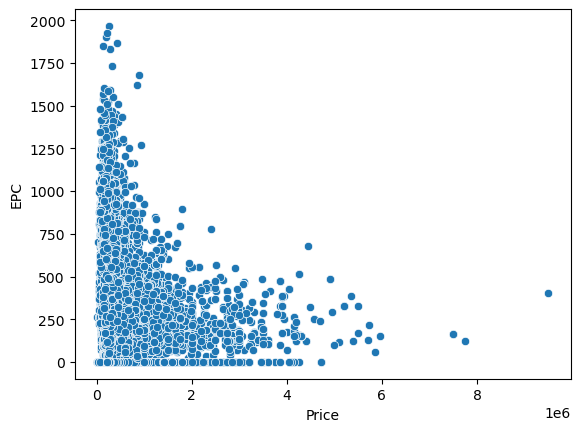

------------------------------
Analysing X: Bedrooms | Y: EPC
count    36064.000000
mean         2.737467
std          1.365374
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         99.000000
Name: Bedrooms, dtype: float64


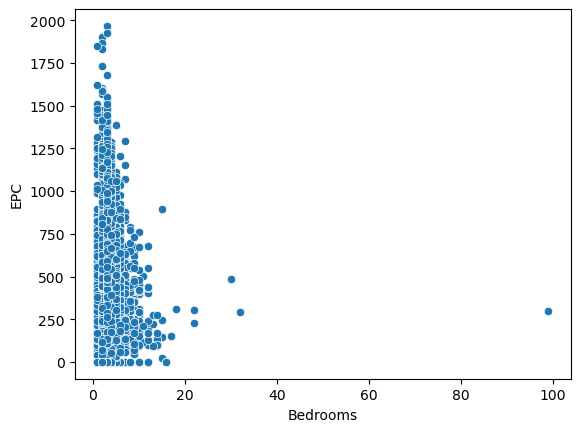

------------------------------
Analysing X: Facades | Y: EPC
count    11780.000000
mean         2.977929
std          0.877130
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Facades, dtype: float64


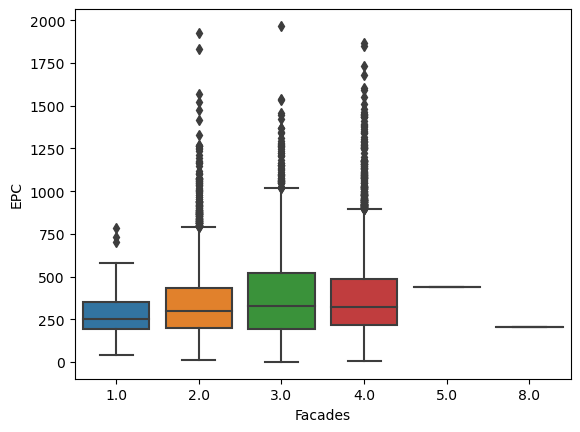

In [17]:
for col in x_cols:
    explore(
        df, x_col=col, y_col=y_col
    )

## Save Processed Data:

In [ ]:
io.save(save_key, df[[*x_cols, y_col]])